In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_data_path = "~/Documents/Customer_Churn_Dashboard/data/customer_churn_clean.csv"

df = pd.read_csv(clean_data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,No,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,5890,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [8]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [10]:
df.groupby("gender")["Churn"].value_counts(normalize=True).unstack() * 100

Churn,No,Yes
gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


In [12]:
df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

Churn,No,Yes
SeniorCitizen,,
No,76.349745,23.650255
Yes,58.318739,41.681261


In [14]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


In [16]:
bins = [0, 12, 24, 48, 72]
labels = ['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

df[['tenure', 'TenureGroup']].head()

,tenure,TenureGroup
0,1,0-1 yr
1,34,2-4 yrs
2,2,0-1 yr
3,45,2-4 yrs
4,2,0-1 yr


In [18]:
df.groupby("TenureGroup")["Churn"].value_counts(normalize=True).unstack() * 100

/var/folders/b7/6xhllfdx0m7fgcyfhk3_mnbr0000gn/T/ipykernel_16168/1145154342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("TenureGroup")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
TenureGroup,,
0-1 yr,52.321839,47.678161
1-2 yrs,71.289062,28.710938
2-4 yrs,79.611041,20.388959
4-6 yrs,90.486824,9.513176


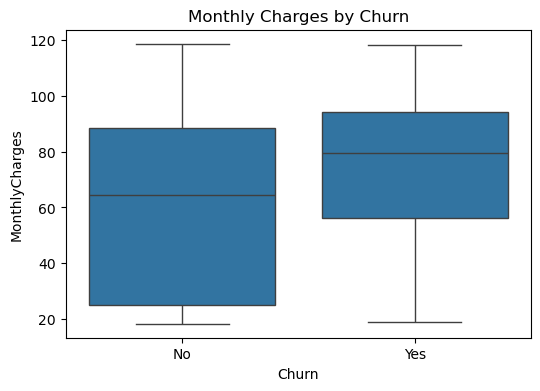

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()

In [22]:
df.to_csv("~/Documents/Customer_Churn_Dashboard/data/df_model_ready.csv", index=False)

In [24]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack().to_csv(
    "~/Documents/Customer_Churn_Dashboard/data/churn_by_contract.csv"
)